In [1]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect ("sales_database.db")
cursor =con.cursor()

In [3]:
cursor.execute("drop table if exists sales")

In [4]:
cursor.execute(""" create table sales(
                            sales_ID int primary key ,
                            product varchar(50),
                            location varchar(50),
                            selling_price int ,
                            profit int ) """)
                                        

In [5]:
cursor.execute("""
        insert into sales(sales_ID , product ,location ,selling_price ,profit)
                    values 
                        (10,"furniture","bengaluru",5000,500),
    (11,"electronics","mysore",15000,400),
    (12,"decor_material","bengaluru", 3500,200),
    (13,"furniture","mumbai",12000,4000),
    (14,"electronics","mumbai",10000,4000),
    (15,"decor_material","mysore", 3000,350) """)

In [6]:
con.commit()

### Getting data

In [7]:
query= "select * from sales ;"
sales_data = pd.read_sql_query(query , con)
print(sales_data)

   sales_ID         product   location  selling_price  profit
0        10       furniture  bengaluru           5000     500
1        11     electronics     mysore          15000     400
2        12  decor_material  bengaluru           3500     200
3        13       furniture     mumbai          12000    4000
4        14     electronics     mumbai          10000    4000
5        15  decor_material     mysore           3000     350


### Understanding Data

In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sales_ID       6 non-null      int64 
 1   product        6 non-null      object
 2   location       6 non-null      object
 3   selling_price  6 non-null      int64 
 4   profit         6 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 372.0+ bytes


In [9]:
sales_data.describe()

,sales_ID,selling_price,profit
count,6.000000,6.000000,6.000000
mean,12.500000,8083.333333,1575.000000
std,1.870829,4964.037335,1880.890746
min,10.000000,3000.000000,200.000000
25%,11.250000,3875.000000,362.500000
50%,12.500000,7500.000000,450.000000
75%,13.750000,11500.000000,3125.000000
max,15.000000,15000.000000,4000.000000


### Data of sales where the profit is above 1000

In [10]:
sales_data[sales_data["profit"]>1000]

,sales_ID,product,location,selling_price,profit
3,13,furniture,mumbai,12000,4000
4,14,electronics,mumbai,10000,4000


### Sorting the data according to selling_price

In [11]:
sales_data.sort_values(by="selling_price",ascending = False)

,sales_ID,product,location,selling_price,profit
1,11,electronics,mysore,15000,400
3,13,furniture,mumbai,12000,4000
4,14,electronics,mumbai,10000,4000
0,10,furniture,bengaluru,5000,500
2,12,decor_material,bengaluru,3500,200
5,15,decor_material,mysore,3000,350


### Getting the aggrigation of selling_price and profit

In [12]:
sales_data.groupby("location").agg({"profit":["sum","mean","max"],"selling_price":["sum","mean","max"]})

profit               selling_price                
             sum    mean   max           sum     mean    max
location                                                    
bengaluru    700   350.0   500          8500   4250.0   5000
mumbai      8000  4000.0  4000         22000  11000.0  12000
mysore       750   375.0   400         18000   9000.0  15000

### Plotting the bar for product vs profit

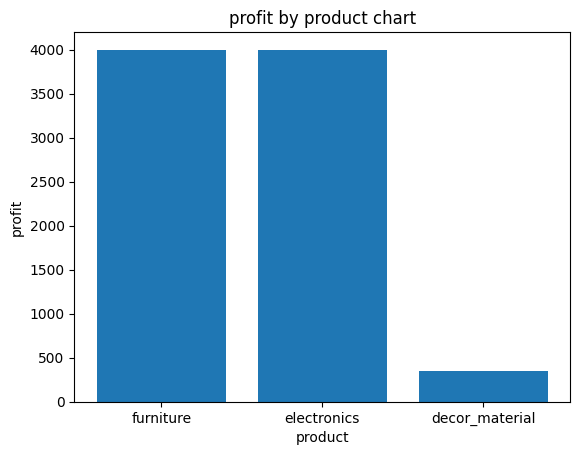

In [17]:
plt.bar(sales_data["product"],sales_data["profit"])
plt.xlabel('product')
plt.ylabel('profit')
plt.title('profit by product chart')
plt.savefig("profit by product chart.png")
plt.show()

### Directly loading data of a particular location

In [14]:
sales_blore="select * from sales where location = 'bengaluru';"
sales_blore= pd.read_sql_query(sales_blore , con)
print(sales_blore)

   sales_ID         product   location  selling_price  profit
0        10       furniture  bengaluru           5000     500
1        12  decor_material  bengaluru           3500     200


In [15]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sales_ID       6 non-null      int64 
 1   product        6 non-null      object
 2   location       6 non-null      object
 3   selling_price  6 non-null      int64 
 4   profit         6 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 372.0+ bytes
